In [47]:
import wandb
from roboflow import Roboflow
wandb.login()

True

In [49]:
from roboflow import Roboflow
#Non mosaic
rf = Roboflow(api_key="AawnMSY19Y3YNcmMjZWX")
project = rf.workspace("lidarimages-9xnln").project("xr-synthesizer")
dataset = project.version(6).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [48]:
from roboflow import Roboflow
#Added from outside sarah and lyftet but mosaic
rf = Roboflow(api_key="AawnMSY19Y3YNcmMjZWX")
project = rf.workspace("lidarimages-9xnln").project("xr-synthesizer")
dataset = project.version(5).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Xr-Synthesizer-5 in yolov5pytorch:: 100%|██████████| 566/566 [00:00<00:00, 9622.19it/s]


In [1]:

from roboflow import Roboflow
rf = Roboflow(api_key="AawnMSY19Y3YNcmMjZWX")
project = rf.workspace("lidarimages-9xnln").project("xr-synthesizer")
dataset = project.version(4).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Xr-Synthesizer-4 in yolov5pytorch:: 100%|██████████| 272/272 [00:00<00:00, 10403.72it/s]


In [2]:
!python3.9 train.py --img 1280 --batch 24 --epochs 10 --data "Xr-Synthesizer-4/data.yaml" --weights yolov5m6.pt --cache --hyp "data/hyps/hyp.VOC.yaml"

wandb: Currently logged in as: totto. Use `wandb login --relogin` to force relogin
train: weights=yolov5m6.pt, cfg=, data=Xr-Synthesizer-4/data.yaml, hyp=data/hyps/hyp.VOC.yaml, epochs=10, batch_size=24, imgsz=1280, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/Tottowich/Yolo ✅
YOLOv5 🚀 v6.1-253-g1e97f70 Python-3.9.13 torch-1.10.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3090, 24235MiB)

hyperparameters: lr0=0.00334, lrf=0.15135, momentum=0.74832, weight_decay=0.00025, warmup_epochs=3.3835, warmup_momentum=0.59462, warmup_bias_lr=0.18657, box=0.02, cl

In [11]:
!python3.9 detect.py --weights runs/train/exp9/weights/best.pt --source "Xr-Synthesizer-4/test/images/image_1_jpg.rf.e0ba606a9c49c7ae965ffc5f415ffb78.jpg" --img 1280 --conf 0.2

detect: weights=['runs/train/exp9/weights/best.pt'], source=Xr-Synthesizer-4/test/images/image_1_jpg.rf.e0ba606a9c49c7ae965ffc5f415ffb78.jpg, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-253-g1e97f70 Python-3.9.13 torch-1.10.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3090, 24235MiB)

Fusing layers... 
Model summary: 378 layers, 35248920 parameters, 0 gradients, 48.9 GFLOPs
Pre pred : im shape torch.Size([1, 3, 640, 1280])
Post pred : im shape torch.Size([1, 3, 640, 1280])
Pre NMS : pred tensor([[[6.29094e+00, 1.74756e+00, 1.60538e+01, 3.17961e+01, 7.62547e-05, 9.99996e-01],
         [1.41280e+01, 1.53732e+00, 2.31445e+01, 1.86701e+01, 1.33698e-04, 9

In [8]:
!python3.9 val.py --weights runs/train/exp5/weights/last.pt --data "Xr-Synthesizer-4/data.yaml" --conf 0.3 --img 1280

val: data=Xr-Synthesizer-4/data.yaml, weights=['runs/train/exp5/weights/last.pt'], batch_size=32, imgsz=1280, conf_thres=0.3, iou_thres=0.6, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-251-gfb8faaf Python-3.9.13 torch-1.10.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3090, 24235MiB)

Fusing layers... 
Model summary: 290 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
val: Scanning '/home/linuxjohansson/Code/XrSynth/Yolo/Xr-Synthesizer-4/valid/lab
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all          6         20          1          1      0.995       0.64
Speed: 1.2ms pre-process, 9.8ms inference, 1.4ms NMS per image at shape (32, 3, 1280, 1280)
Results saved to runs/val/exp3


In [51]:
!python3.9 detect.py --weights yolov5x6.pt --source "Xr-Synthesizer-4/test/images/image_1_jpg.rf.e0ba606a9c49c7ae965ffc5f415ffb78.jpg" --img 1280 --conf 0.2

detect: weights=['yolov5x6.pt'], source=Xr-Synthesizer-4/test/images/image_1_jpg.rf.e0ba606a9c49c7ae965ffc5f415ffb78.jpg, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-254-gfeb1671 Python-3.9.13 torch-1.10.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3090, 24235MiB)

Fusing layers... 
YOLOv5x6 summary: 574 layers, 140730220 parameters, 0 gradients, 209.6 GFLOPs
Pre pred : im shape torch.Size([1, 3, 640, 1280])
Post pred : im shape torch.Size([1, 3, 640, 1280])
Pre NMS : pred tensor([[[8.52054e+00, 5.18334e+00, 1.56734e+01,  ..., 1.54464e-03, 7.83525e-04, 1.89526e-03],
         [1.14687e+01, 5.08727e+00, 2.18793e+01,  ..., 1.54808e-03, 8.15641e-04, 1.91

In [ ]:
lidarImages/4_people_standard_room/image_2.jpg,Xr-Synthesizer-4/test/images/image_7_jpg.rf.dc94710b4d559bc61e3baf53a2a309c7.jpg

In [52]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [31]:
a = np.random.random((1,64,1024,3))


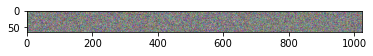

(640, 1280, 3)


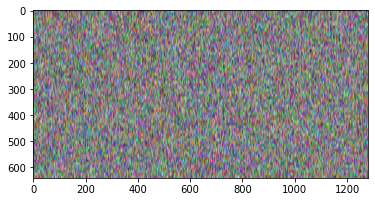

In [47]:
a = np.random.random((1,64,1024,3))
plt.imshow(X=a[0])
plt.show()
a = cv2.resize(a[0],(1280,640),interpolation=cv2.INTER_LINEAR)
#a = np.stack(a, 0)
print(a.shape)
plt.imshow(X=a)

In [58]:
class ARG:
    weights = "runs/train/Moist-Wind/weights/best.pt"
    imgsz = 1280
    data = "Xr-Synthesizer-6/data.yaml"
    conf_thres = 0.25
    iou_thres = 0.45
    line_thickness = 3
    hide_labels = False
    hide_conf = False
    half = False
    dnn = False
    device = 0
    auto = True
    augment = False
    classes = None
    OU_ip = "192.168.200.78"
    udp_port = 7502
    tcp_port = 7503
    agnostic_nms = False
    max_det = 1000
    disp_pred = True

In [59]:
args = ARG()
device = select_device(device=args.device)
model, stride, names, pt, device,live = initialize_network(args,device)
logger = create_logger()

INFO - 2022-07-06 13:20:51,997 - torch_utils - YOLOv5 🚀 v6.1-254-gfeb1671 Python-3.9.13 torch-1.10.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3090, 24235MiB)

YOLOv5 🚀 v6.1-254-gfeb1671 Python-3.9.13 torch-1.10.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3090, 24235MiB)

INFO - 2022-07-06 13:20:52,091 - torch_utils - YOLOv5 🚀 v6.1-254-gfeb1671 Python-3.9.13 torch-1.10.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3090, 24235MiB)

YOLOv5 🚀 v6.1-254-gfeb1671 Python-3.9.13 torch-1.10.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3090, 24235MiB)

INFO - 2022-07-06 13:20:52,586 - yolo - Fusing layers... 
Fusing layers... 
INFO - 2022-07-06 13:20:53,350 - torch_utils - Model summary: 574 layers, 139970872 parameters, 0 gradients, 207.9 GFLOPs
Model summary: 574 layers, 139970872 parameters, 0 gradients, 207.9 GFLOPs


In [20]:
"Xr-Synthesizer-4/train/images/image_0_jpg.rf.54d014cb9dce43508282d04d354fca4d.jpg"
"../lidarImages/4_people_standard_room/image_8.jpg"

'../lidarImages/4_people_standard_room/image_8.jpg'

In [36]:
%matplotlib inline
#%pylab inline

In [189]:
img0 = cv2.imread("Xr-Synthesizer-6/test/images/image_20_jpg.rf.dea87199a35ff6d3cebac8901951ea57.jpg").astype(np.float32)
print(f"img0.shape: {img0.shape}")
print(f"img0 type: {type(img0)}")

img0 /= 255.0
img0, img = live.prep(img0)
if len(img0.shape) == 3:
    img0 = img0[None]
img = torch.from_numpy(img).to(device)
img = img.half() if model.fp16 else img.float()
pred = model(img,augment=args.augment,visualize=False)
pred = non_max_suppression(pred, args.conf_thres, args.iou_thres, args.classes, args.agnostic_nms, max_det=args.max_det)
s = type("Scan",(object,),{"h":64,"w":1024,"d":3})
#obj= proj_vec(pred,img[0],s)
#plt.scatter(obj[:,0],obj[:,1])
print(pred)
#visualize_yolo_test(pred,img,args,logger=logger,names= ["adult"])

img0.shape: (640, 1280, 3)
img0 type: <class 'numpy.ndarray'>
[tensor([[8.88385e+02, 1.16502e+02, 9.91285e+02, 5.66211e+02, 8.21352e-01, 0.00000e+00],
        [1.23124e+02, 7.24109e+01, 2.58732e+02, 5.50111e+02, 8.00093e-01, 0.00000e+00],
        [5.02442e+02, 1.27744e+02, 5.88631e+02, 4.92214e+02, 7.85585e-01, 0.00000e+00],
        [6.98742e+02, 1.56846e+02, 7.72501e+02, 4.68066e+02, 7.45777e-01, 0.00000e+00]], device='cuda:0')]


In [174]:
s = type("Scan",(object,),{"h":64,"w":1024,"d":3})
def visualize_yolo_test(pred,img,args,scan=s,logger=None,names=None):
    detections = 0
    obj_dim, heights = proj_vec(pred,img0,scan) 
    for i,det in enumerate(pred):
        detections += 1
        img0 = np.ascontiguousarray(copy(img).squeeze().permute(1,2,0).cpu().numpy())
        annotator = Annotator(img0, line_width=args.line_thickness, example=str(names))
        if len(det):
            #print(img.shape[2:],img.squeeze().permute(1,2,0).shape)
            det[:,:4] = scale_coords(img.shape[2:], det[:,:4], img0.shape).round()
            # if args.disp_pred and logger is not None:
            #     for c in det[:, -1].unique():
            #         n = (det[:, -1] == c).sum()  # detections per class
            #         s += f"{n} {names[int(c)]}{'s' * (n > 1)}, "  # add to string
            # logger.info(f"{names[int(c)]} detections: {s}")
            i = 0
            for *xyxy, conf, cls in reversed(det):
                c = int(cls)  # integer class
                label = None if args.hide_labels else (names[c] if args.hide_conf else f'{names[c]} {conf:.2f} {heights[i][0]:.2f} {heights[i][1]:.2f}')
                i += 1
                annotator.box_label(xyxy, label, color=colors(c, True),txt_color=(0,0,0))
            img0 = annotator.result()
            logger.info(f"Det: {det}")
            img0 = cv2.cvtColor(img0,cv2.COLOR_RGB2BGR)
            #print(f"Post viz Average img: {img0.mean()}")
            plt.imshow(img0)
            plt.show()
            #cv2.waitKey(1)
        else:
            #print(img.shape)
            img0  = annotator.result()
            img0 = cv2.cvtColor(img0,cv2.COLOR_RGB2BGR)
            plt.imshow(img0)
            #print(f"Post viz Average img: {img.mean()}")
            plt.show()
            # cv2.waitKey(1)


In [168]:
def projec_2D_pred(pred,img0,scan,R=25,azi=90,logger=None):
    scale_y = scan.h/img0.shape[1]
    scale_x = scan.w/img0.shape[2]
    img_height = img0.shape[1]
    img_width = img0.shape[2]
    print(f"Image height: {img_height}")
    print(f"Image width: {img_width}")
    to_rad = np.pi/180
    obj_dim = [] # center_x, center_y, center_z, width, height, depth, rotation_x, rotation_y, rotation_z
    heights = [] 
    for det in pred[0]:
        xyxy = det[:4].cpu().numpy()
        x0,y0,x1,y1 = xyxy

        pol_c_x,pol_c_y = (x0+x1)/2,(y0+y1)/2
        width = x1-x0
        height = y1-y0

        ix, iy = int(pol_c_x), int(pol_c_y)

        x0_scaled,y0_scaled,x1_scaled,y1_scaled = x0*scale_x,y0*scale_y,x1*scale_x,y1*scale_y
        #print(f"x0: {x0_scaled},y0: {y0_scaled},x1: {x1_scaled},y1: {y1_scaled}")
        low_y = iy-10 if iy-10>=0 else 0
        high_y = iy+10 if iy+10<img_height else img_height
        low_x = ix-10 if ix-10>=0 else 0
        high_x = ix+10 if ix+10<img_width else img_width
        print(f"low_y: {low_y},high_y: {high_y},low_x: {low_x},high_x: {high_x}")
        r = np.median(img0[2,low_y:high_y,low_x:high_x])
        #print(f"r: {r*R}")
        theta = abs((y0_scaled+y1_scaled)/2 - scan.h/2)
        vert_dist = r*R*np.cos(theta*to_rad)
        print(f"pol_c_x: {pol_c_x}")
        angles = 2*np.pi*(pol_c_x/img_width)
        print("angles: ",angles)
        center_x = np.cos(angles)*vert_dist
        center_y = np.sin(angles)*vert_dist

        #print(f"theta: {theta}")
        l = 2*np.tan(azi/2*to_rad)*vert_dist
        #print(f"l: {l}")
        det_h = l*(y1_scaled-y0_scaled)/scan.h
        center_z = det_h/2
        rot = angles
        obj_dim.append([center_x,center_y,center_z,width,height,det_h,0,0,rot])
        #print(f"Det_h: {det_h}")
        heights.append([det_h,r*R])
    plt.scatter(np.array(obj_dim)[:,0],np.array(obj_dim)[:,1])
    plt.scatter(0,0,c='r')
    plt.show()
    print(obj_dim)
    return heights

Image height: 1280
Image width: 3
low_y: 331,high_y: 351,low_x: 929,high_x: 3
pol_c_x: 939.835205078125
angles:  1968.3862505723293
low_y: 301,high_y: 321,low_x: 180,high_x: 3
pol_c_x: 190.92816162109375
angles:  399.87900660815524
low_y: 299,high_y: 319,low_x: 535,high_x: 3
pol_c_x: 545.536865234375
angles:  1142.5697387218115
low_y: 302,high_y: 322,low_x: 725,high_x: 3
pol_c_x: 735.6216430664062
angles:  1540.6823664527167


Mean of empty slice.
invalid value encountered in divide


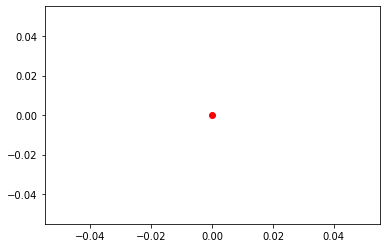

[[nan, nan, nan, 102.89978, 449.70905, nan, 0, 0, 1968.3862505723293], [nan, nan, nan, 135.60864, 477.70044, nan, 0, 0, 399.87900660815524], [nan, nan, nan, 86.18887, 364.47015, nan, 0, 0, 1142.5697387218115], [nan, nan, nan, 73.75964, 311.21973, nan, 0, 0, 1540.6823664527167]]


[[nan, nan], [nan, nan], [nan, nan], [nan, nan]]

In [169]:
projec_2D_pred(pred,img0[0],s,R=25,azi=90)
# det = pred[0]
    # xyxy = det[:,:4].cpu().numpy()
    # x0,y0,x1,y1 = xyxy
    # pol_c_x,pol_c_y = (x0+x1)/2,(y0+y1)/2
    # widths = x1-x0
    # heights = y1-y0

    # ix, iy = pol_c_x.astype(np.int8), pol_c_y.astype(np.int8)
    # x0_scaled, y0_scaled, x1_scaled, y1_scaled = x0*scale_x,y0*scale_y,x1*scale_x,y1*scale_y
    # low_y = np.where(iy-10>=0,iy-10,0)
    # high_y = np.where(iy+10<img_height,iy+10,img_height)
    # low_x = np.where(ix-10>=0,ix-10,0)
    # high_x = np.where(ix+10<img_width,ix+10,img_width)
    # r = np.array([np.median(img0[2,ly:hy,lx:hx].cpu().numpy()) for ly,hy,lx,hx in zip(low_y,high_y,low_x,high_x)])
    # print(r)
    # theta = (y0_scaled+y1_scaled)/2 - scan.h/2
    # #vert_dist = [r_*R*np.cos(theta_*to_rad) for r_,theta_ in zip(r,theta)]
    # vert_dist = np.multiply(theta,r)
    # angles = 2*np.pi*(pol_c_x/img_width)
    # center_x = np.multiply(np.cos(angles),vert_dist)
    # center_y = np.multiply(np.sin(angles),vert_dist)
    # l = 2*np.tan(azi/2*to_rad)*vert_dist
    # det_h = np.multiply(l,(y1_scaled-y0_scaled)/scan.h)
    # center_z = det_h/2
    # print(f"x0: {x0},y0: {y0},x1: {x1},y1: {y1}")
    # return np.array([center_x,center_y,center_z,widths,heights,det_h,np.zeros_like(center_x),np.zeros_like(center_x),angles])

In [190]:
%timeit proj_vec(pred,img[0],s)
#res,h = proj_vec(pred,img[0],s)
#plt.scatter(res[:,0],res[:,1])
#plt.show()

Image height: 640
Image width: 1280
low_y: 331,high_y: 351,low_x: 929,high_x: 949
pol_c_x: 939.835205078125
angles:  4.613405274778897
low_y: 301,high_y: 321,low_x: 180,high_x: 200
pol_c_x: 190.92816162109375
angles:  0.9372164217378638
low_y: 299,high_y: 319,low_x: 535,high_x: 555
pol_c_x: 545.536865234375
angles:  2.677897825129246
low_y: 302,high_y: 322,low_x: 725,high_x: 745
pol_c_x: 735.6216430664062
angles:  3.6109742963735543
Image height: 640
Image width: 1280
low_y: 331,high_y: 351,low_x: 929,high_x: 949
pol_c_x: 939.835205078125
angles:  4.613405274778897
low_y: 301,high_y: 321,low_x: 180,high_x: 200
pol_c_x: 190.92816162109375
angles:  0.9372164217378638
low_y: 299,high_y: 319,low_x: 535,high_x: 555
pol_c_x: 545.536865234375
angles:  2.677897825129246
low_y: 302,high_y: 322,low_x: 725,high_x: 745
pol_c_x: 735.6216430664062
angles:  3.6109742963735543
Image height: 640
Image width: 1280
low_y: 331,high_y: 351,low_x: 929,high_x: 949
pol_c_x: 939.835205078125
angles:  4.6134052

In [186]:
def proj_vec(pred,img0,scan,R=25,azi=90,logger=None):
    scale_y = scan.h/img0.shape[1]
    scale_x = scan.w/img0.shape[2]# det = pred[0]
    
    print(f"Image height: {img_height}")
    print(f"Image width: {img_width}")
    to_rad = np.pi/180
    obj_dim = [] # center_x, center_y, center_z, width, height, depth, rotation_x, rotation_y, rotation_z
    heights = []
    
    
    for det in pred[0]:
        xyxy = det[:4].cpu().numpy()
        x0,y0,x1,y1 = xyxy

        pol_c_x,pol_c_y = (x0+x1)/2,(y0+y1)/2
        width = x1-x0
        height = y1-y0

        ix, iy = int(pol_c_x), int(pol_c_y)

        x0_scaled,y0_scaled,x1_scaled,y1_scaled = x0*scale_x,y0*scale_y,x1*scale_x,y1*scale_y
        #print(f"x0: {x0_scaled},y0: {y0_scaled},x1: {x1_scaled},y1: {y1_scaled}")
        low_y = iy-10 if iy-10>=0 else 0
        high_y = iy+10 if iy+10<img_height else img_height
        low_x = ix-10 if ix-10>=0 else 0
        high_x = ix+10 if ix+10<img_width else img_width
        print(f"low_y: {low_y},high_y: {high_y},low_x: {low_x},high_x: {high_x}")
        r = np.median(img0[2,low_y:high_y,low_x:high_x].cpu().numpy())
        #print(f"r: {r*R}")
        theta = abs((y0_scaled+y1_scaled)/2 - scan.h/2)
        vert_dist = r*R*np.cos(theta*to_rad)
        print(f"pol_c_x: {pol_c_x}")
        angles = 2*np.pi*(pol_c_x/img_width)
        print("angles: ",angles)
        center_x = np.cos(angles)*vert_dist
        center_y = np.sin(angles)*vert_dist

        #print(f"theta: {theta}")
        l = 2*np.tan(azi/2*to_rad)*vert_dist
        #print(f"l: {l}")
        det_h = l*(y1_scaled-y0_scaled)/scan.h
        center_z = det_h/2
        rot = angles
        obj_dim.append([center_x,center_y,center_z,width,0,det_h,0,0,rot])
        #print(f"Det_h: {det_h}")
        heights.append([det_h,r*R])
    
    pred_dict = {"pred_boxes": np.array(obj_dim), "pred_scores": pred[:,4], "pred_labels": pred[:,5]}
    return pred_dict

In [9]:
%load_ext autoreloaddef projec_2D_pred(pred,img0,scan,R=25,azi=9
ROOT = FILE
if str(ROOT) not in sys.path:
    sys.path.append(str(ROOT)) # Add ROOT
ROOT = Path(os.path.relpath(ROOT, Path.cwd())) # Relative Path

In [54]:
import argparse
import os, sys
import glob
from pathlib import Path
import time
import numpy as np
import torch
import math
import threading
from concurrent.futures import ThreadPoolExecutor
import matplotlib.pyplot as plt 
from queue import Queue
from copy import copy
import yaml
from pathlib import Path
FILE = os.path.abspath('')
ROOT = FILE
if str(ROOT) not in sys.path:
    sys.path.append(str(ROOT)) # Add ROOT
ROOT = Path(os.path.relpath(ROOT, Path.cwd())) # Relative Path
import open3d
sys.path.insert(0, '../OusterTesting')
sys.path.insert(1, '../OpenPCDet-linux')
from models.common import DetectMultiBackend
import torch.backends.cudnn as cudnn
import utils_ouster
from tools.transmitter import Transmitter
from tools.visual_utils.open3d_live_vis import LiveVisualizer
from ouster import client
from contextlib import closing
from tools.visual_utils import open3d_vis_utils as V
#from pcdet.config import cfg, cfg_from_yaml_file
#from pcdet.datasets import DatasetTemplate
#from pcdet.models import build_network, load_data_to_gpu
from tools.xr_synth_utils import CSVRecorder,TimeLogger,filter_predictions,format_predictions,display_predictions
from tools.xr_synth_utils import create_logger
from utils.general import (LOGGER, check_file, check_img_size, check_imshow, check_requirements, colorstr, cv2,
                           increment_path, non_max_suppression, print_args, scale_coords, strip_optimizer, xyxy2xywh)
from utils.plots import Annotator, colors, save_one_box
from utils.torch_utils import select_device, time_sync
from utils.augmentations import Albumentations, augment_hsv, copy_paste, letterbox, mixup, random_perspective
class live_stream:
    """
    Class to stream data from a Sensor.
    Inheritance:
        DatasetTemplate:
            Uses batch processing and collation.
    """
    def __init__(self, classes,ip,stride=32,img_size=(1280,640), logger=None,auto=True):
        """
        Args:
            root_path:
            dataset_cfg:
            class_names:
            training:
            logger:
        """
        self.classes = classes
        self.ip = ip

        self.stride = stride
        self.img_size = img_size
        self.logger = logger
        self.auto = auto
        self.rect = True
        self.frame = 0
        
    def prep(self,img0):
        """started
        Prepare data from the lidar sensor.
        args:
            points: xyz/xyzr points from sensor.
        """
        #print(self.img_size)
        #print(img0.shape)
        img = self.reshape(copy(img0))
       # print(img.shape)
        if len(img.shape) == 3:
            img = img[None]
        #img = img[..., ::-1].transpose((0,3,1,2))  # BGR to RGB, BHWC to BCHW
        img = img.transpose((0,3,1,2))  # BGR to RGB, BHWC to BCHW
        
        img = np.ascontiguousarray(img)
        self.frame += 1
        return img0,img
    def reshape(self,img):
        """
        Reshape the data to be compatible with the model.
        Args:
            img:
        """
        img = cv2.resize(img,self.img_size,interpolation=cv2.INTER_LINEAR)
        return img

def initialize_network(args,device):
    device = select_device(args.device)
    model = DetectMultiBackend(args.weights, device=device, dnn=args.dnn, data=args.data, fp16=args.half)
    stride, names, pt = model.stride, model.names, model.pt
    imgsz = (args.imgsz, args.imgsz) if isinstance(args.imgsz, int) else args.imgsz  # tuple
    imgsz = check_img_size(imgsz=imgsz, s=stride)
    imgsz = (imgsz[0],imgsz[0])
    model.warmup(imgsz=(1 if pt else 1, 3, *imgsz))
    live = live_stream(classes=names,ip=args.OU_ip,stride=stride,auto=args.auto)

    return model, stride, names, pt, device,live
def initialize_timer(transmitter,logger,args):
    time_logger = TimeLogger(logger,args.disp_pred)
    time_logger.create_metric("Ouster Processing")
    #time_logger.create_metric("Pre Processing")
    #time_logger.create_metric("Load GPU")
    time_logger.create_metric("Infrence")
    time_logger.create_metric("Post Processing")
    time_logger.create_metric("Format Predictions")

    if args.visualize:
        time_logger.create_metric("Visualize")
    if args.save_csv:
        time_logger.create_metric("Save CSV")
    if transmitter.started_udp:
        time_logger.create_metric("Transmit TD")
    if transmitter.started_ml:
        time_logger.create_metric("Transmit UE5")
    time_logger.create_metric("Full Pipeline")

    return time_logger
def visualize_yolo(pred,img,args,fig=None,plot=None,names=None,logger=None):
    detections = 0
    #print(f"Pre viz Average img: {img.mean()}")
    for i,det in enumerate(pred):
        detections += 1
        annotator = Annotator(img.cpu().numpy()[0], line_width=args.line_thickness, example=str(names))
        if len(det):
            #print(img.shape[2:],img.squeeze().permute(1,2,0).shape)
            det[:,:4] = scale_coords(img.shape[2:], det[:,:4], img.squeeze().permute(1,2,0).shape).round()
            # if args.disp_pred and logger is not None:
            #     for c in det[:, -1].unique():
            #         n = (det[:, -1] == c).sum()  # detections per class
            #         s += f"{n} {names[int(c)]}{'s' * (n > 1)}, "  # add to string
            # logger.info(f"{names[int(c)]} detections: {s}")
            for *xyxy, conf, cls in reversed(det):
                c = int(cls)  # integer class
                label = None if args.hide_labels else (names[c] if args.hide_conf else f'{names[c]} {conf:.2f}')
                annotator.box_label(xyxy, label, color=(255,255,255))#colors(c, True))
            img0 = annotator.result()
            print(img0.shape)
            logger.info(f"Det: {det}")
            cv2.imshow("Predictions",cv2.cvtColor(img0.transpose(1,2,0),cv2.COLOR_RGB2BGR))
            cv2.waitKey(1)
            time.sleep(100)
            exit()
        else:
            #print(img.shape)
            cv2.imshow("Predictions",cv2.cvtColor(img[0].cpu().numpy().transpose(1,2,0),cv2.COLOR_RGB2BGR))
            #print(f"Post viz Average img: {img.mean()}")
            cv2.waitKey(1)




def parse_config():
    parser = argparse.ArgumentParser(description='arg parser')
    #parser.add_argument('--cfg_file', type=str, default='cfgs/kitti_models/second.yaml',
    #                    help='specify the config for demo')
    parser.add_argument('--weights', nargs='+', type=str, default=ROOT / 'yolov5s.pt', help='model path(s)')
    parser.add_argument('--imgsz', '--img', '--img-size', nargs='+', type=int, default=1280, help='inference size h,w')
    parser.add_argument('--data', type=str, default=ROOT / 'data/coco128.yaml', help='(optional) dataset.yaml path')
    parser.add_argument('--max_det', type=int, default=1000, help='maximum detections per image')
    parser.add_argument('--conf_thres', type=float, default=0.25, help='confidence threshold')
    parser.add_argument('--iou_thres', type=float, default=0.45, help='NMS IoU threshold')
    parser.add_argument('--line_thickness', default=3, type=int, help='bounding box thickness (pixels)')
    parser.add_argument('--hide_labels', default=False, action='store_true', help='hide labels')
    parser.add_argument('--hide_conf', default=False, action='store_true', help='hide confidences')
    parser.add_argument('--half', action='store_true', help='use FP16 half-precision inference')
    parser.add_argument('--dnn', action='store_true', help='use OpenCV DNN for ONNX inference')
    parser.add_argument('--device', default='', help='cuda device, i.e. 0 or 0,1,2,3 or cpu')    
    parser.add_argument('--ckpt', type=str, default=None, help='specify the pretrained model')
    parser.add_argument('--auto', action='store_true', help='auto size using the model')
    parser.add_argument('--augment', action='store_true', help='augmented inference')
    parser.add_argument('--classes', nargs='+', type=int, help='filter by class: --classes 0, or --classes 0 2 3')

    #parser.add_argument('--ext', type=str, default='.bin', help='specify the extension of your point cloud data file')
    parser.add_argument('--OU_ip', type=str, default=None, help='specify the ip of the sensor')
    parser.add_argument('--name', type=str, default=None, help='specify the name of the sensor')
    parser.add_argument('--UE5_ip', type=str, default=None, help='specify the ip of the UE5 machine')
    parser.add_argument('--TD_ip', type=str, default=None, help='specify the ip of the TD machine')

    parser.add_argument('--udp_port', type=int, default=7502, help='specify the udp port of the sensor')
    parser.add_argument('--tcp_port', type=int, default=7503, help='specify the tcp port of the sensor')
    parser.add_argument('--TD_port', type=int, default=7002, help='specify the port of the TD machine')
    parser.add_argument('--UE5_port', type=int, default=7000, help='specify the port of the UE5 machine')
    parser.add_argument('--time', type=int, default=100
    , help='specify the time to stream data from a sensor')
    #parser.add_argument('--save_dir', type=str, default="../lidarCSV", help='specify the save directory')
    #parser.add_argument('--save_name', type=str, default="test_csv", help='specify the save name')
    if sys.version_info >= (3,9):
        parser.add_argument('--agnostic-nms', action='store_true', help='class-agnostic NMS')
        parser.add_argument('--visualize', action=argparse.BooleanOptionalAction)
        parser.add_argument('--save_csv', action=argparse.BooleanOptionalAction)
        parser.add_argument('--log_time', action=argparse.BooleanOptionalAction)
        parser.add_argument('--disp_pred', action=argparse.BooleanOptionalAction) 
        

    else:
        parser.add_argument('--visualize', action='store_true')
        parser.add_argument('--no-visualize', dest='visualize', action='store_false')
        parser.add_argument('--save_csv', action='store_true')
        parser.add_argument('--no-save_csv', dest='save_csv', action='store_false')
        parser.add_argument('--log_time', action='store_true')
        parser.add_argument('--no-log_time', dest='log_time', action='store_false')
        parser.add_argument('--disp_pred', action='store_true')
        parser.add_argument('--no-disp_pred', dest='disp_pred', action='store_false')
        parser.set_defaults(visualize=True)
        parser.set_defaults(save_csv=False)
    args = parser.parse_args()
    with open(args.data,'r') as f:
        try:
            data_config = yaml.safe_load(f)
        except:
            raise ValueError(f"Invalid data config file: {args.data}")
        #cfg_from_yaml_file(args.cfg_file, cfg)

    return args,data_config#, cfg


@torch.no_grad()
def main():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    args,data_config = parse_config()
    fig = None
    plot = None
    cudnn.benchmark = True  # set True to speed up constant image size inference
    #model = DetectMultiBackend(args.weights, device=device, dnn=args.dnn, data=args.data, fp16=args.half)
    logger = create_logger()
    model, stride, names, pt, device,live = initialize_network(args,device)
    if args.OU_ip is None and args.name is None:
        raise ValueError('Please specify the ip or sensor name of the ')
    # Select classes to use, None -> all.
    # classes_to_use = [8]
    # Set up interactions
    #live = live_stream(cfg.DATA_CONFIG, cfg.CLASS_NAMES, logger=logger)
    if args.save_csv:
        recorder = CSVRecorder(args.save_name,args.save_dir, cfg.CLASS_NAMES)
    limits = {"ir":6000,"reflectivity": 255, "range":25000}
    #if range_limit is not None:
    #    cfg.DATA_CONFIG.POINT_CLOUD_RANGE = [-range_limit[0],-range_limit[1],-range_limit[2],range_limit[0],range_limit[1],range_limit[2]]
        
    # Set up network
    #model = initialize_network(cfg,args,logger,live)
    # Set up local network ports for IO
    transmitter = Transmitter(reciever_ip=args.TD_ip, reciever_port=args.TD_port, classes_to_send=[9])
    transmitter.start_transmit_udp()
    transmitter.start_transmit_ml()
    try:
        [cfg_ouster, host_ouster] = utils_ouster.sensor_config(args.name if args.name is not None else args.OU_ip,args.udp_port,args.tcp_port)
    except:
        raise ConnectionError('Could not connect to the sensor')
    log_time = False # False to let the program run for one loop to warm up :)
    if args.log_time:
        time_logger = initialize_timer(logger=logger,transmitter=transmitter,args=args)


    with closing(client.Scans.stream(host_ouster, args.udp_port,complete=False)) as stream:
        logger.info(f"Streaming lidar data to: Yolov5 using {args.weights}")
         # time 
        
        start_stream = time.monotonic()
        
        for i,scan in enumerate(stream): # Ouster scan object
            if log_time:
                time_logger.start("Ouster Processing")
            # Get lidar data
            img0 = utils_ouster.ir_ref_range(stream,scan,limits)
            
            #img0 /= 255
            img0, img = live.prep(img0)
            if len(img0.shape) == 3:
                img0 = img0[None]
            img = torch.from_numpy(img).to(device)
            img = img.half() if model.fp16 else img.float()  # uint8 to fp16/32
            if log_time:
                time_logger.stop("Ouster Processing")
            
            #if range_limit is not None:
            #    xyzr = utils_ouster.trim_xyzr(xyzr,range_limit)
            #xyzr = utils_ouster.trim_data(data=xyzr,range_limit=range_limit,source=stream,scan=scan)
            #print(f"Input point cloud shape: {xyzr.shape}")
            if i%2 == 0 and log_time:
                time_logger.start("Full Pipeline")
            if i%2 == 1 and log_time and i != 1:
                time_logger.stop("Full Pipeline")
            i+=1
            #if log_time:
            #    time_logger.start("Data Prep")
            #data_dict = live.prep(xyzr)
            #if log_time:
            #    time_logger.stop("Data Prep")
            #print(f"data_dict: {data_dict}\npoints.shape = {data_dict['points'].shape}")
            #print(f"points: {sum(data_dict['points'][:,0]==0)}")
            #print(f"points: {(data_dict['points'][:8,:])}")

            #print(f"points.shape: {data_dict['points'][0].shape}")
            

            #if log_time:
            #    time_logger.start("Load GPU")
            #load_data_to_gpu(data_dict)
            #if log_time:
            #    time_logger.stop("Load GPU")
           # print(img.shape)
            if log_time:
                time_logger.start("Infrence")
            
            pred = model(img,augment=args.augment)
            if log_time:
                time_logger.stop("Infrence")
            if log_time:
                time_logger.start("Post Processing")
            pred = non_max_suppression(pred, args.conf_thres, args.iou_thres, args.classes, args.agnostic_nms, max_det=args.max_det)
            if log_time:
                time_logger.stop("Post Processing")
            #print(pred)
            
            #if log_time:
            #    time_logger.start("Filter Predictions")
            # Only uses pred_dicts[0] since batch size is one at live infrence
            #pred_dicts = filter_predictions(pred_dicts[0], classes_to_use)
            #if log_time:
            #    time_logger.stop("Filter Predictions")
                
            
            
            # if args.save_csv: # If recording, save to csv
            #     if log_time:
            #         time_logger.start("Save CSV")
            #     recorder.add_frame_file(copy(data_dict["points"][:,1:-1]).cpu().numpy(),pred_dicts)
            #     if log_time:
            #         time_logger.stop("Save CSV")
                #logger.info(f"Time to save to csv: {time.monotonic() - start:.3e}")
            
            # if transmitter.started_ml:
            #     if log_time:
            #         time_logger.start("Transmit UE5")
            #     transmitter.pcd = copy(data_dict["points"][:,1:])
            #     transmitter.pred_dict = copy(pred_dicts)
            #     transmitter.send_pcd()
            #     if log_time:
            #         time_logger.stop("Transmit UE5")


            # if transmitter.started_udp: # If transmitting, send to udp
            #     if log_time:
            #         time_logger.start("Transmit TD")
            #     transmitter.pred_dict = copy(pred_dicts)
            #     transmitter.send_dict()
            #     if log_time:
            #         time_logger.stop("Transmit TD")

            #logger.info(f"Frame {live.frame}")
            if args.visualize:

                if log_time:
                    time_logger.start("Visualize")
                visualize_yolo(pred,img,args,names = data_config["names"],logger=logger)
                if log_time:
                    time_logger.stop("Visualize")
                #vis = V.create_live_scene(data_dict['points'][:,1:],ref_boxes=pred_dicts[0]['pred_boxes'],
                #ref_scores=pred_dicts[0]['pred_scores'], ref_labels=pred_dicts[0]['pred_labels'])
            # #elif args.visualize:
            #     start = time.monotonic()
            #     #V.update_live_scene(vis,pts,points=data_dict['points'][:,1:], ref_boxes=pred_dicts[0]['pred_boxes'],
            #     #    ref_scores=pred_dicts[0]['pred_scores'], ref_labels=pred_dicts[0]['pred_labels'],class_names=cfg.CLASS_NAMES)
            #     if log_time:
            #         time_logger.start("Visualize")
            #     vis.update(points=data_dict['points'][:,1:], 
            #                 pred_boxes=pred_dicts['pred_boxes'],
            #                 pred_labels=pred_dicts['pred_labels'],
            #                 pred_scores=pred_dicts['pred_scores'],
            #                 )
            #     if log_time:
            #         time_logger.stop("Visualize")
            if time.monotonic()-start_stream > args.time:
                stream.close()
                break
            if log_time and args.disp_pred:
                print("\n")
            #if i == 6:
            #    break 
            log_time = args.log_time
    transmitter.stop_transmit_udp()
    transmitter.stop_transmit_ml()
    if log_time:
        time_logger.visualize_results()
    logger.info("Stream Done")

"""
NuScenes uses the following labels:
    CLASS_NAMES: ['car','truck', 'construction_vehicle', 'bus', 'trailer',
              'barrier', 'motorcycle', 'bicycle', 'pedestrian', 'traffic_cone']
    Note: 'pedestrian is predicted as index 9'
    This program uses has been tested with the Ouster OS0-64 sensor.
    Example Input:
        python3 live_predictions.py --cfg_file 'cfgs/nuscenes_models/cbgs_voxel0075_res3d_centerpoint.yaml' --ckpt "../checkpoints/cbgs_voxel0075_centerpoint_nds_6648.pth" --OU_ip "192.168.200.78" --TD_ip "192.168.200.103" --TD_port 7002  --time 300 --udp_port 7001 --tcp_port 7003 --name "OS0-64" --visualize

"""

#if __name__ == '__main__':
#    main()



'\nNuScenes uses the following labels:\n    CLASS_NAMES: [\'car\',\'truck\', \'construction_vehicle\', \'bus\', \'trailer\',\n              \'barrier\', \'motorcycle\', \'bicycle\', \'pedestrian\', \'traffic_cone\']\n    Note: \'pedestrian is predicted as index 9\'\n    This program uses has been tested with the Ouster OS0-64 sensor.\n    Example Input:\n        python3 live_predictions.py --cfg_file \'cfgs/nuscenes_models/cbgs_voxel0075_res3d_centerpoint.yaml\' --ckpt "../checkpoints/cbgs_voxel0075_centerpoint_nds_6648.pth" --OU_ip "192.168.200.78" --TD_ip "192.168.200.103" --TD_port 7002  --time 300 --udp_port 7001 --tcp_port 7003 --name "OS0-64" --visualize\n\n'